In [1]:
import os
import numpy as np
import pandas as pd
import pandas_ta as ta
import mplfinance as mpf
import vectorbt as vbt
import matplotlib.pyplot as plt
from dataset import TickDataset
from utils import fib

In [6]:
df = pd.read_csv('data/trades/2023-04-04_BTCUSDT_binance_trades.csv', delimiter=',')

In [11]:
df = df.assign(net=lambda x: x.qty * -(-1) ** x.isBuyerMaker.astype('int'))

In [13]:
df.head()

,Unnamed: 0,aggrID,price,qty,firstID,lastID,time,isBuyerMaker,isBestMatch,net
0,0,2595222144,27800.00,0.00054,3070143448,3070143448,1680566400000,True,True,0.00054
1,1,2595222145,27800.00,0.00054,3070143449,3070143449,1680566400001,True,True,0.00054
2,2,2595222146,27800.00,0.00442,3070143450,3070143450,1680566400004,True,True,0.00442
3,3,2595222147,27800.01,0.00195,3070143451,3070143451,1680566400006,False,True,-0.00195
4,4,2595222148,27800.01,0.00236,3070143452,3070143452,1680566400006,False,True,-0.00236


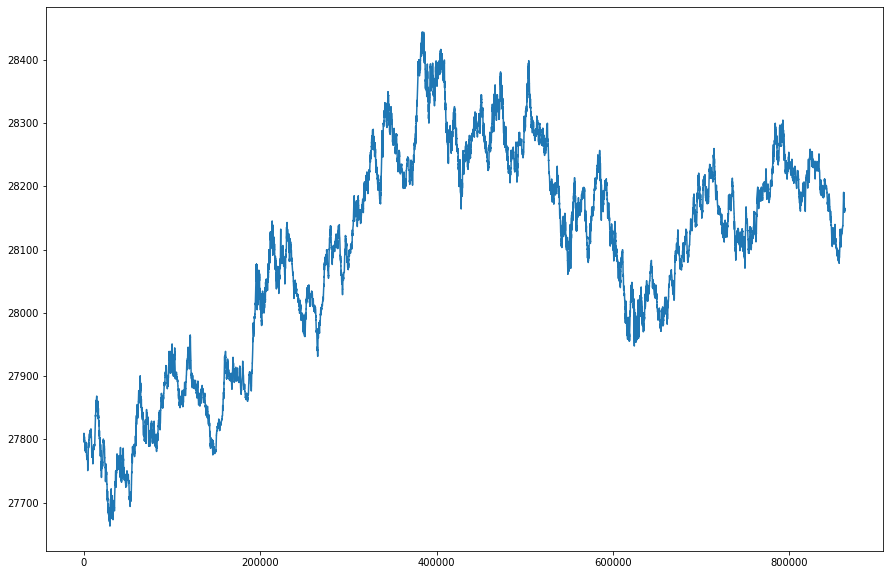

In [67]:
plt.figure(figsize=(15, 10))
plt.plot(df.price)
plt.show()

In [3]:
for i in range(5, 15):
    print(fib(i))

5
8
13
21
34
55
89
144
233
377


In [5]:
ticks = TickDataset().get_data(from_date='2023-04-01', to_date='2023-04-01', n_per_candle=1, divide_by='n_trades')


KeyboardInterrupt



In [ ]:
ticks.shape

In [ ]:
ticks = ticks.drop(columns=['first_id', 'last_id'])

In [22]:
ticks = ticks.assign(candle_size=lambda x: x.high - x.low)

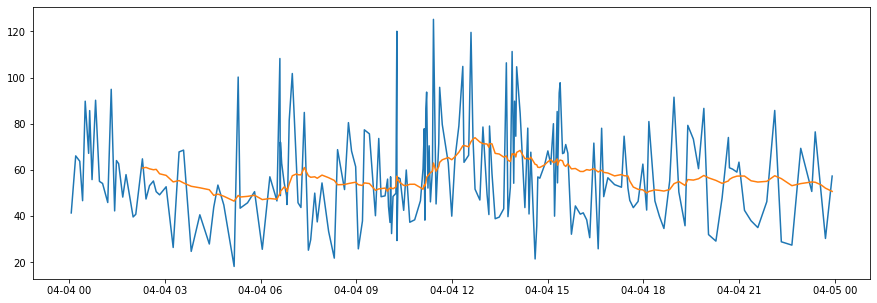

In [23]:
plt.figure(figsize=(15, 5))
plt.plot(ticks['candle_size'])
plt.plot(ticks['candle_size'].rolling(21).mean())
plt.show()

In [16]:
# ticks = ticks.assign(higher_band=lambda x: x.ta.sma(20) + x.candle_size.rolling(20).mean() / 13 * x.close.rolling(20).std())
# ticks = ticks.assign(lower_band=lambda x: x.ta.sma(20) - x.candle_size.rolling(20).mean() / 13 * x.close.rolling(20).std())

In [24]:
ticks = ticks.assign(higher_band=lambda x: x.ta.sma(20) + x.candle_size.rolling(20).mean() / x.candle_size.rolling(200).mean() * x.close.rolling(20).std() * 1.8)
ticks = ticks.assign(lower_band=lambda x: x.ta.sma(20) - x.candle_size.rolling(20).mean() / x.candle_size.rolling(200).mean() * x.close.rolling(20).std() * 1.8)

C:\Users\aeali\AppData\Local\Temp\ipykernel_7208\547404561.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


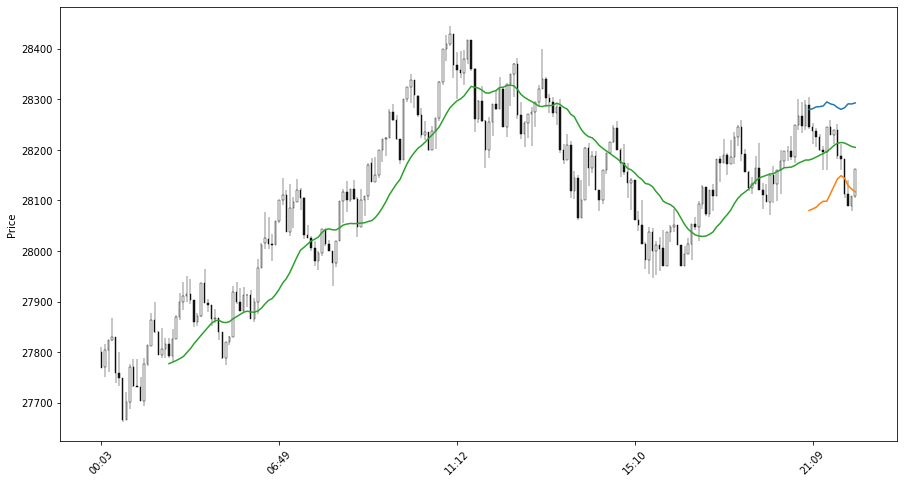

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
mpf.plot(ticks.iloc[-300:], type='candle', volume=False, ax=ax)
ax.plot(ticks.iloc[-300:]['higher_band'].to_numpy())
ax.plot(ticks.iloc[-300:]['lower_band'].to_numpy())
ax.plot(ticks.ta.sma(20).iloc[-300:].to_numpy())
fig.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
mpf.plot(ticks.iloc[-300:], type='candle', volume=False, ax=ax)
ax.plot(ticks.ta.bbands(20).loc[:, ['BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0']].iloc[-300:].to_numpy())
fig.show()

In [ ]:
btc_price = ticks.close

In [ ]:
returns_dic = {}
for fast_idx in range(10, 201, 10):
    for slow_idx in range(fast_idx + 10, 211):
        fast_ma = vbt.MA.run(btc_price, fast_idx, short_name='fast')
        slow_ma = vbt.MA.run(btc_price, slow_idx, short_name='slow')
        entries = fast_ma.ma_crossed_above(slow_ma)
        exits = fast_ma.ma_crossed_below(slow_ma)
        pf = vbt.Portfolio.from_signals(btc_price, entries, exits)
        returns_dic[(fast_idx, slow_idx)] = pf.total_return()

In [ ]:
max(returns_dic.values()), [key for key, value in returns_dic.items() if value == max(returns_dic.values())]

In [ ]:
ticks = TickDataset().get_data(from_date='2022-04-16', to_date='2022-04-16', n_per_candle=377, divide_by='n_trades')

In [ ]:
ticks.shape

In [ ]:
mpf.plot(ticks.iloc[-200:], type='candle', volume=True, figsize=(12, 8))

In [ ]:
btc_price = ticks.close

In [ ]:
returns_dic = {}
for fast_idx in range(10, 201, 10):
    for slow_idx in range(fast_idx + 10, 211):
        fast_ma = vbt.MA.run(btc_price, fast_idx, short_name='fast')
        slow_ma = vbt.MA.run(btc_price, slow_idx, short_name='slow')
        entries = fast_ma.ma_crossed_above(slow_ma)
        exits = fast_ma.ma_crossed_below(slow_ma)
        pf = vbt.Portfolio.from_signals(btc_price, entries, exits)
        returns_dic[(fast_idx, slow_idx)] = pf.total_return()

In [ ]:
max(returns_dic.values()), [key for key, value in returns_dic.items() if value == max(returns_dic.values())]